<a href="https://colab.research.google.com/github/Ashish62014/calculator/blob/main/Another_copy_of_Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 1.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 49.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 2.9 MB/s eta 0:00:00
Upload person image:


Saving tempImageL7t20t.jpeg to tempImageL7t20t.jpeg
Upload clothing image (PNG with transparent background recommended):


Saving tempImageQLcDLx.jpeg to tempImageQLcDLx.jpeg


100%|████████████████████████████████████████| 176M/176M [00:00<00:00, 133GB/s]


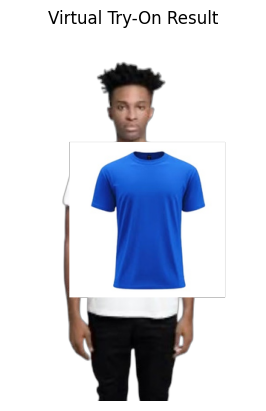

In [1]:
# Install necessary packages
!pip install -q rembg opencv-python matplotlib numpy pillow onnxruntime # Added onnxruntime to the installation

import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from rembg import remove

# ... (rest of the code remains the same) ...

def load_image(image_path):
    img = Image.open(image_path).convert("RGB")
    return img

def remove_bg(img):
    return remove(img)

def overlay_clothing(person_img, clothing_img, position=(100, 100), scale=0.5):
    person_np = np.array(person_img)
    clothing_img = clothing_img.convert("RGBA")

    # Resize clothing
    new_size = (int(clothing_img.width * scale), int(clothing_img.height * scale))
    # Use Image.Resampling.LANCZOS instead of Image.ANTIALIAS
    clothing_img = clothing_img.resize(new_size, Image.Resampling.LANCZOS)

    # Paste clothing on top
    person_img.paste(clothing_img, position, clothing_img)
    return person_img

# Upload images
from google.colab import files
print("Upload person image:")
person_file = files.upload()
print("Upload clothing image (PNG with transparent background recommended):")
cloth_file = files.upload()

# Process and display
person_path = list(person_file.keys())[0]
cloth_path = list(cloth_file.keys())[0]

person = load_image(person_path)
cloth = load_image(cloth_path)

# Remove background of person
person_nobg = remove_bg(person)

# Try on clothes (adjust position/scale if needed)
result = overlay_clothing(person_nobg, cloth, position=(80, 150), scale=0.6)

# Show result
plt.imshow(result)
plt.axis("off")
plt.title("Virtual Try-On Result")
plt.show()
